The purpose of this notebook is to predict the age of abalone from physical measurements. 

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [2]:
# Load the dataset
path_data = 'abalone/abalone.data'
df = pd.read_csv(path_data, header=None, names=[
    'Sex', 'Length', 'Diameter', 'Height', 'WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings'
])

In [3]:
# Explore the dataset
df.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.describe()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


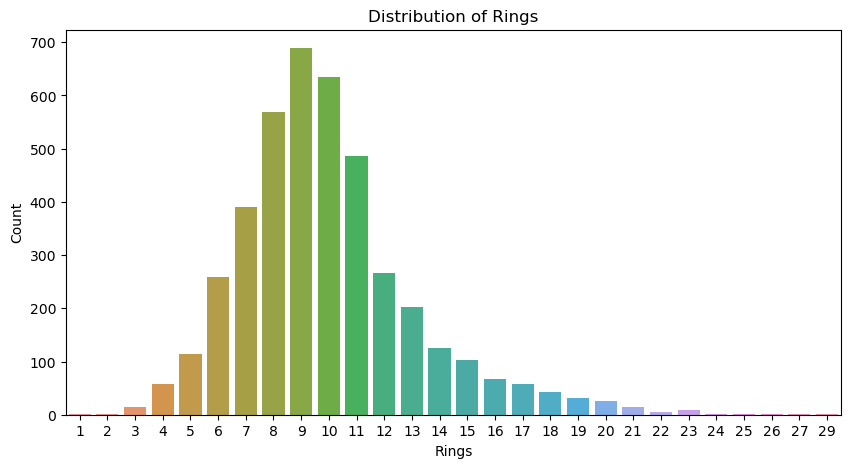

In [20]:
# bar chart of Rings distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='Rings', data=df)
plt.title('Distribution of Rings')
plt.xlabel('Rings')
plt.ylabel('Count')
plt.show()


/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

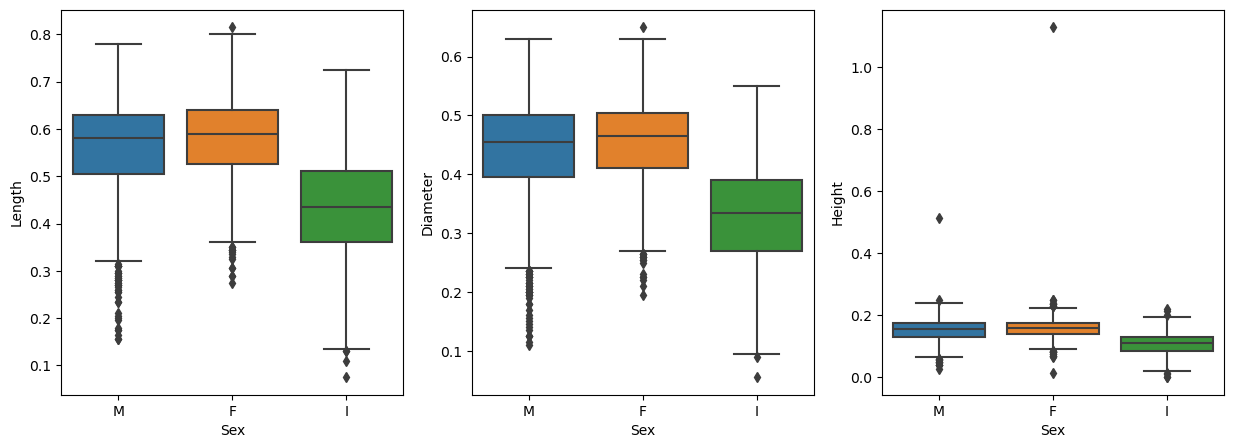

In [5]:
# boxplot of length, Diameter, Height based on Sex category
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='Sex', y='Length', data=df)
plt.subplot(1, 3, 2)
sns.boxplot(x='Sex', y='Diameter', data=df)
plt.subplot(1, 3, 3)
sns.boxplot(x='Sex', y='Height', data=df)
plt.show()

/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

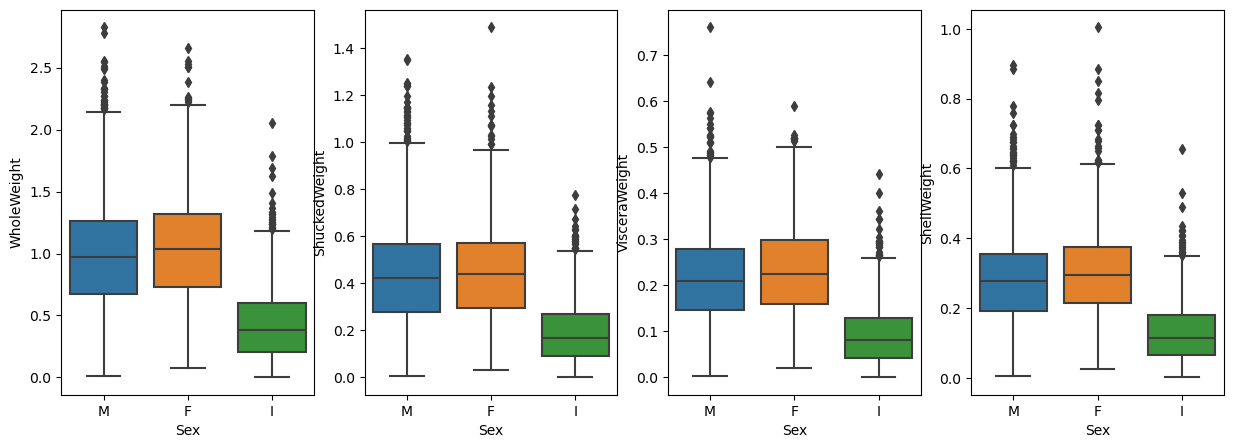

In [6]:
# boxplot of the different weight based on Sex category
plt.figure(figsize=(15, 5))
plt.subplot(1, 4, 1)
sns.boxplot(x='Sex', y='WholeWeight', data=df)
plt.subplot(1, 4, 2)
sns.boxplot(x='Sex', y='ShuckedWeight', data=df)
plt.subplot(1, 4, 3)
sns.boxplot(x='Sex', y='VisceraWeight', data=df)
plt.subplot(1, 4, 4)
sns.boxplot(x='Sex', y='ShellWeight', data=df)
plt.show()

/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/ernes/miniconda3/envs/ml/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

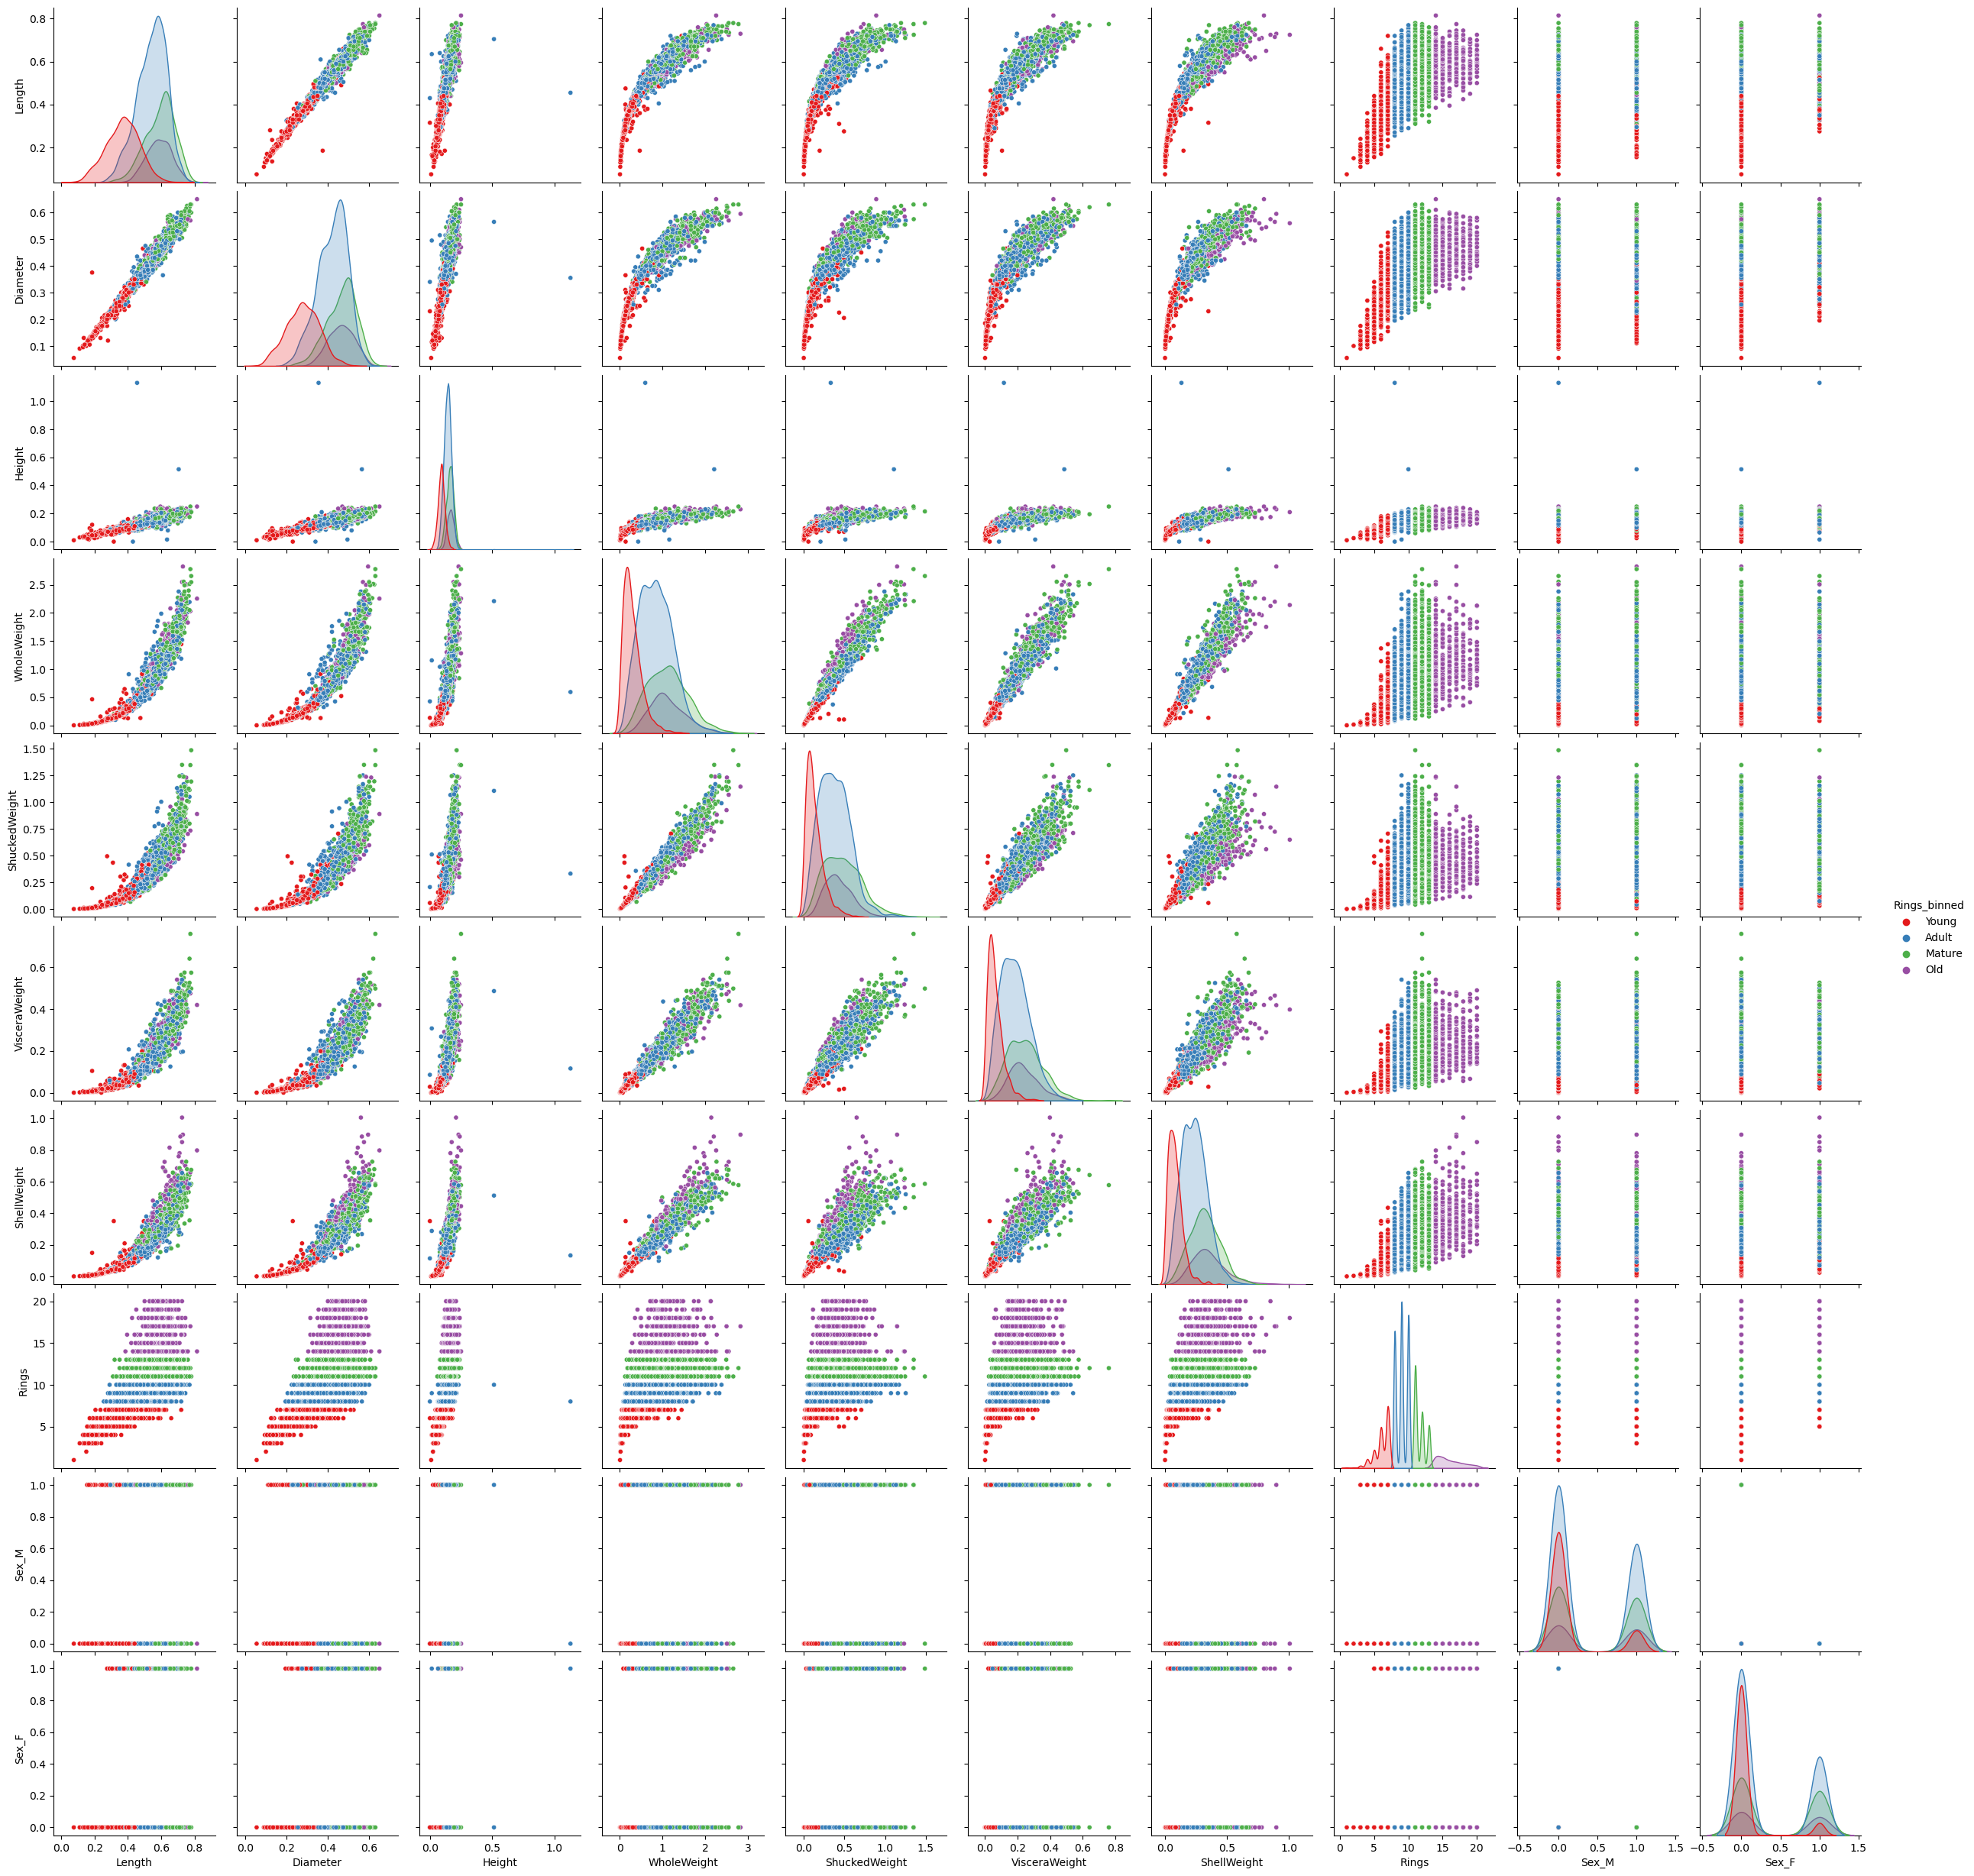

In [36]:
import numpy as np

# Bin 'Rings' into categories
df['Rings_binned'] = pd.cut(df['Rings'], bins=[0, 7, 10, 13, 20], labels=['Young', 'Adult', 'Mature', 'Old'])
sns.pairplot(df, hue='Rings_binned', palette='Set1', plot_kws={'s': 20})
plt.show()

In [9]:
# Preprocess the data
# M, F, and I (infant)
# Create column for one-hot encoding
# Sex_M, Sex_F
# M -> [1, 0]
# F -> [0, 1]
# I -> [0, 0]
df['Sex_M'] = (df['Sex'] == 'M').astype(int)
df['Sex_F'] = (df['Sex'] == 'F').astype(int)
df.head(5)

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings,Sex_M,Sex_F
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,1,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,1,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0


In [10]:
df.drop(columns=['Sex'], inplace=True)

In [11]:
# Prepare features and target variable
# Use all columns except 'Rings' as features
X = df.drop(columns=['Rings'])
y = df['Rings']



In [12]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X_train.values.reshape(-1, 9)
# X_test = X_test.values.reshape(-1, 9)

In [21]:
# Build and train the KNN Regression model
k = 7
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)
# Make predictions
y_pred = knn_reg.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (lower, better): {mse}')
print(f'R^2 Score (higher, better): {r2}')

Mean Squared Error: 4.884947759007909
R^2 Score: 0.5487433741747498


In [30]:
# Show the range of Rings within each cluster
for i in range(k):
    cluster_points = y_train.iloc[knn_reg.kneighbors(X_test, return_distance=False)[:, i]]
    print(f'Cluster {i+1}: Min = {cluster_points.min()}, Max = {cluster_points.max()}')


Cluster 1: Min = 3, Max = 23
Cluster 2: Min = 3, Max = 24
Cluster 3: Min = 2, Max = 29
Cluster 4: Min = 3, Max = 26
Cluster 5: Min = 1, Max = 23
Cluster 6: Min = 2, Max = 23
Cluster 7: Min = 3, Max = 22


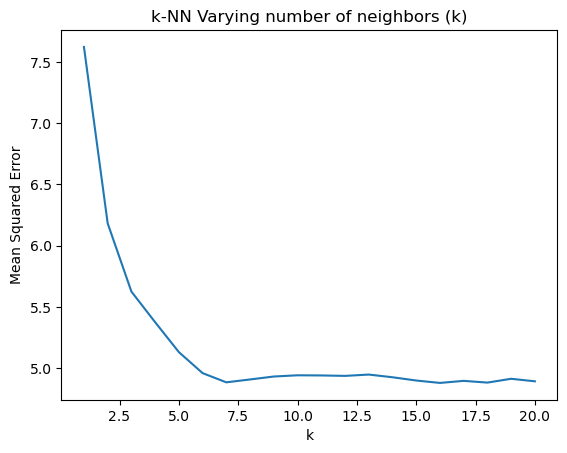

In [15]:
errors = []
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    errors.append(mean_squared_error(y_test, y_pred))

# Plotting
plt.plot(range(1, 21), errors)
plt.title('k-NN Varying number of neighbors (k)')
plt.xlabel('k')
plt.ylabel('Mean Squared Error')
plt.show()

In [16]:
# Build and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (lower, better): {mse}')
print(f'R^2 Score (higher, better): {r2}')

Mean Squared Error: 4.891232447128565
R^2 Score: 0.5481628137889276


Standard Scaler will be applied for the subsequent models

In [33]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Create and train model (minimizes MSE loss function)
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

In [35]:
# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (lower, better): {mse}')
print(f'R^2 Score (higher, better): {r2}')

Mean Squared Error (lower, better): 4.89123244712858
R^2 Score (higher, better): 0.5481628137889263
